In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from google.colab import drive
drive.mount('/content/drive')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

MessageError: ignored

In [ ]:
file_path = '/content/drive/MyDrive/fertilizer prediction model/Fertilizer Prediction.csv'

df = pd.read_csv(file_path)
df.head()
df

NameError: ignored

In [ ]:
df.shape

(99, 9)

In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


<Axes: xlabel='Fertilizer Name', ylabel='count'>

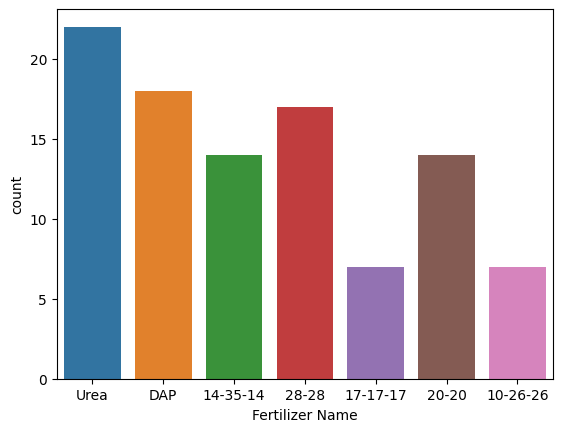

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="Fertilizer Name")

In [ ]:
df["Soil Type"].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [ ]:
df["Crop Type"].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [ ]:
soil = pd.get_dummies(df["Soil Type"])
crop = pd.get_dummies(df["Crop Type"])
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df = pd.concat([df, soil, crop], axis=1)
df2=df
df = df.drop(["Soil Type", "Crop Type"], axis=1)
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Black,Clayey,Loamy,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,26,52,38,37,0,0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,DAP,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,14-35-14,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,28-28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,Urea,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X = df.drop("Fertilizer Name", axis=1)
y = df["Fertilizer Name"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         1
    14-35-14       0.75      1.00      0.86         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      0.67      0.80         3
       28-28       1.00      1.00      1.00         3
         DAP       0.75      1.00      0.86         3
        Urea       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.79      0.81      0.79        20
weighted avg       0.88      0.90      0.88        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

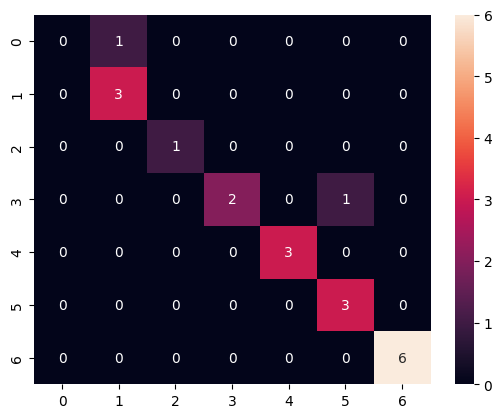

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")

In [ ]:
y_pred

array(['DAP', '20-20', 'DAP', 'Urea', 'Urea', '14-35-14', '28-28',
       '14-35-14', '28-28', 'Urea', 'DAP', 'Urea', '14-35-14', 'DAP',
       'Urea', 'Urea', '20-20', '17-17-17', '28-28', '14-35-14'],
      dtype=object)

In [ ]:
y_pred_df = pd.DataFrame( {'Predicted' : y_pred},index=X_test.index)



In [ ]:
import numpy as np
x = np.random.rand(4, 5)

y = np.sum(x, axis=1)
y.shape

(4,)

In [ ]:
results_df = pd.concat([X_test, y_test, y_pred_df], axis=1)
results_df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,...,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat,Fertilizer Name,Predicted
97,36,60,43,15,0,41,0,0,0,0,...,0,1,0,0,0,0,0,0,DAP,DAP
98,29,58,57,12,0,10,1,0,0,0,...,0,0,0,0,0,1,0,0,20-20,20-20
10,27,54,28,13,0,40,0,1,0,0,...,0,0,0,0,1,0,0,0,DAP,DAP
73,27,53,34,42,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,Urea,Urea
81,30,60,40,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,Urea,Urea
91,34,65,45,6,19,21,0,1,0,0,...,0,0,0,1,0,0,0,0,10-26-26,14-35-14
70,26,52,39,21,0,23,0,1,0,0,...,0,0,0,0,1,0,0,0,28-28,28-28
80,28,54,43,10,8,29,0,1,0,0,...,0,0,0,1,0,0,0,0,14-35-14,14-35-14
3,32,62,34,22,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,28-28,28-28
23,28,54,37,36,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,Urea,Urea


In [ ]:
import numpy as np
a=np.random.randn(3,3)
b=np.random.randn(3,1)
c=a*b
c.shape
c

array([[-0.60982922, -1.21838723,  0.66042429],
       [ 0.27697616, -0.25301168, -0.49609198],
       [ 1.30766475, -1.2136415 ,  1.6572839 ]])